In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from mocap_labels import WALK_TRIALS, RUN_TRIALS, __walk_trials, __run_trials
from gpdm_marginalized import GPDM_Marginalized
import select_joints

<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


pygame 2.6.1 (SDL 2.30.7, Python 3.12.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
reduced_columns = WALK_TRIALS[0].get_columns_for_joints(select_joints.WALKING_SIMPLIFIED_JOINTS)

Training GPDM for subject 5 trial 1...


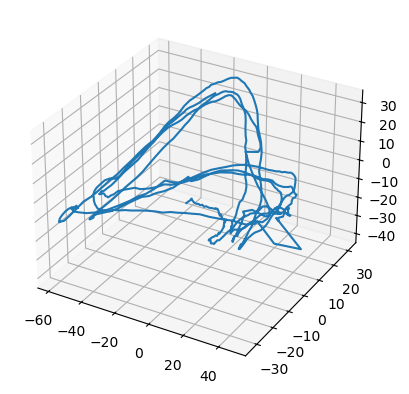

Training GPDM for subject 6 trial 1...


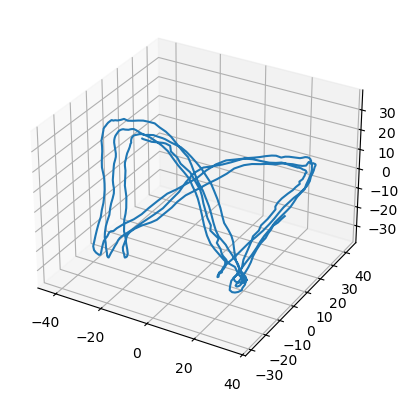

Training GPDM for subject 8 trial 6...


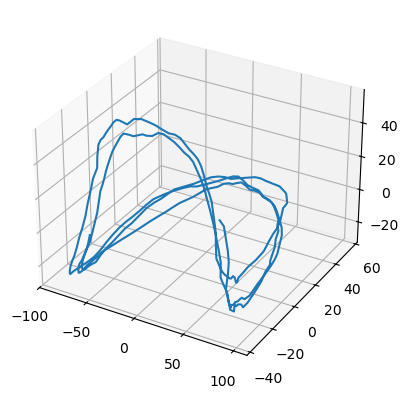

Training GPDM for subject 8 trial 7...


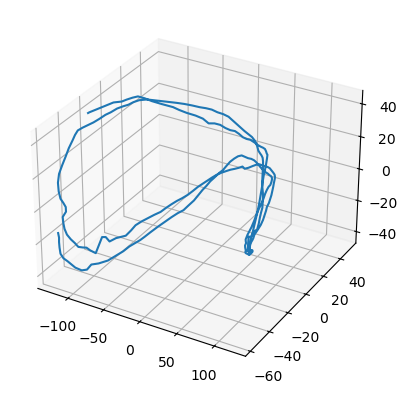

Training GPDM for subject 2 trial 2...


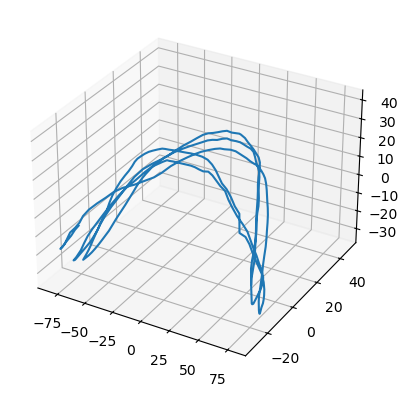

In [4]:

# Select 5 random trials and train a GPDM for each
# Then, plot the latent space for each trial

random_walk_mocaps = random.sample(WALK_TRIALS, 5)

walking_gpdm_trajectories = []
for mocap in random_walk_mocaps:

    print(f"Training GPDM for subject {mocap.subject} trial {mocap.trial}...")

    arr = mocap.as_dataframe()[reduced_columns].to_numpy().astype(np.float64)
    gpdm = GPDM_Marginalized(arr, 3)
    gpdm.fit()
    latent_trajectory = gpdm.X_map
  
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(latent_trajectory[:, 0], latent_trajectory[:, 1], latent_trajectory[:, 2])
    plt.show()




Training GPDM for subject 35 trial 17...


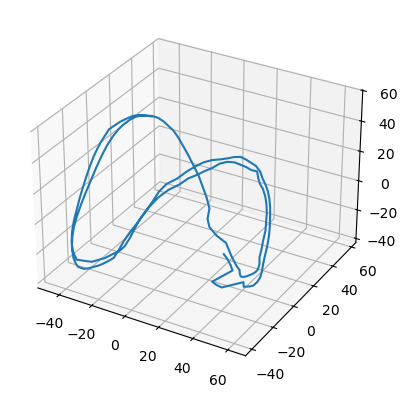

Training GPDM for subject 35 trial 21...


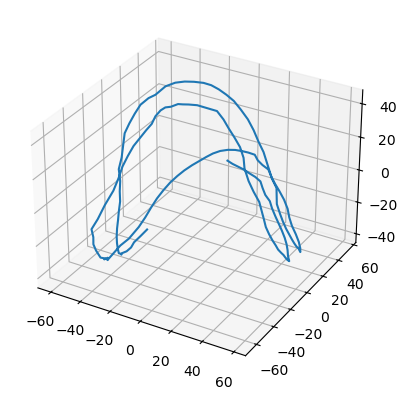

Training GPDM for subject 16 trial 36...


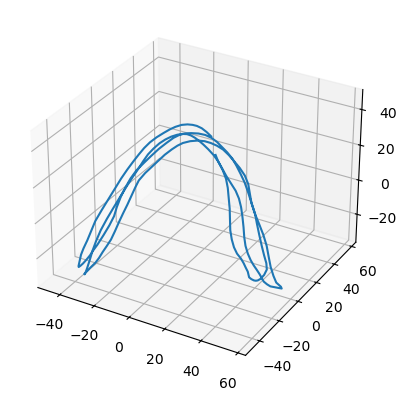

Training GPDM for subject 9 trial 8...


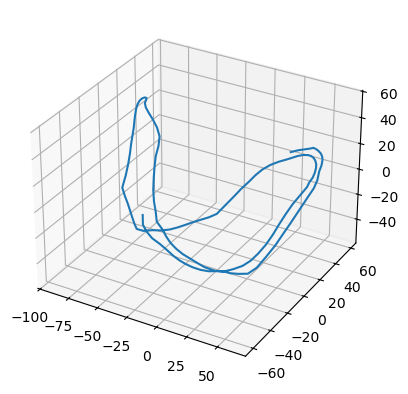

Training GPDM for subject 35 trial 19...


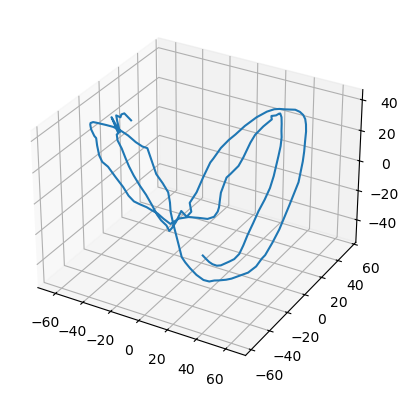

In [6]:
# Repeat for running trials

random_run_mocaps = random.sample(RUN_TRIALS, 5)

running_gpdm_trajectories = []
for mocap in random_run_mocaps:

    print(f"Training GPDM for subject {mocap.subject} trial {mocap.trial}...")

    arr = mocap.as_dataframe()[reduced_columns].to_numpy().astype(np.float64)
    gpdm = GPDM_Marginalized(arr, 3)
    gpdm.fit()
    latent_trajectory = gpdm.X_map
  
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(latent_trajectory[:, 0], latent_trajectory[:, 1], latent_trajectory[:, 2])
    plt.show()
